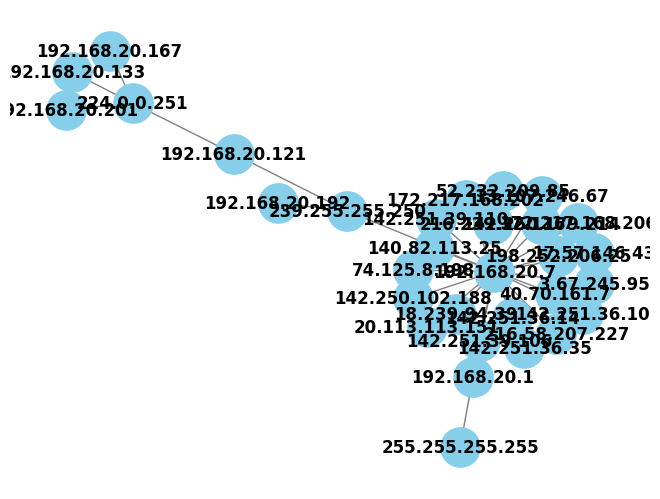

In [1]:
import pyshark
import networkx as nx
import matplotlib.pyplot as plt
import nest_asyncio
nest_asyncio.apply()

def generate_network_graph(pcap_file):
    # Create an empty graph
    graph = nx.Graph()

    # Open the PCAP file for reading
    cap = pyshark.FileCapture(pcap_file)

    # Iterate over each packet in the PCAP file
    for packet in cap:
        try:
            # Extract source and destination IP addresses
            source_ip = packet.ip.src
            destination_ip = packet.ip.dst
            
            # Add nodes and edges to the graph
            graph.add_node(source_ip)
            graph.add_node(destination_ip)
            graph.add_edge(source_ip, destination_ip)
        except AttributeError:
            # Skip packets without IP layer
            pass

    return graph

def visualize_graph(graph):
    pos = nx.spring_layout(graph)
    
    nx.draw(graph, pos, with_labels=True, font_weight='bold', node_color='skyblue', node_size=800, edge_color='gray')
    plt.show()

if __name__ == "__main__":
    try:
        pcap_file = "/Users/eugenie/thesis/trace.pcap"  # Path to your PCAP file
        network_graph = generate_network_graph(pcap_file)
        visualize_graph(network_graph)
    except KeyboardInterrupt:
        print("Stopped generating network traffic data.")